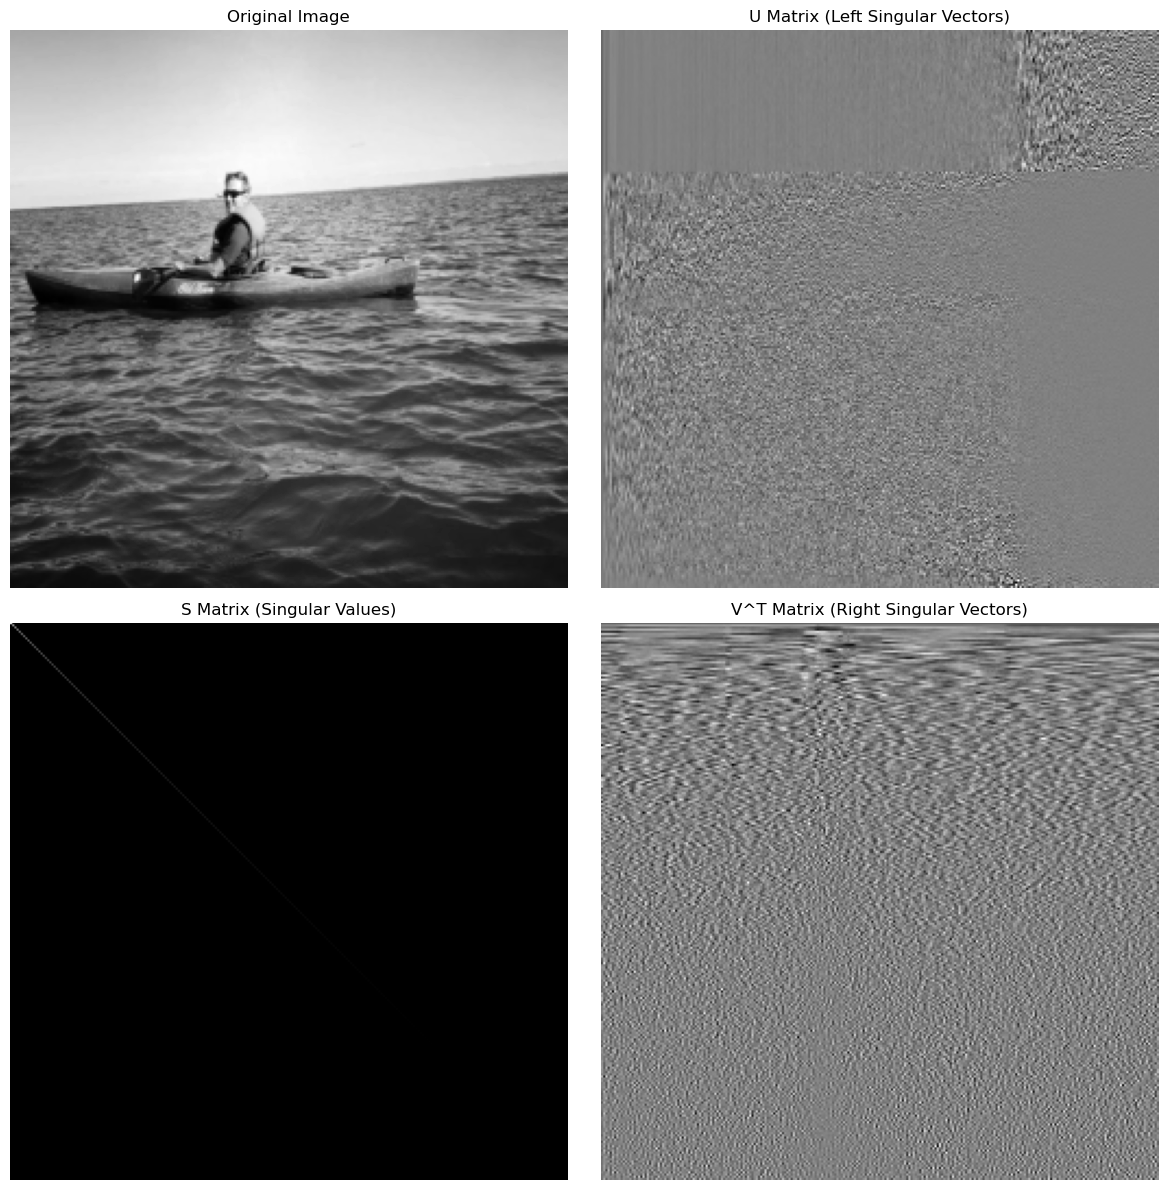

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color
from skimage.transform import resize
from skimage.io import imread


# Load a sample image (grayscale)
image_path = r'Screenshot 2023-07-16 235910.png'  
image = imread(image_path, as_gray=True)

# image = data.camera()
image_resized = resize(image, (256, 256), anti_aliasing = True)

# Apply SVD
U, S, Vt = np.linalg.svd(image_resized, full_matrices = False)

# Reconstruct the image using SVD components
S_matrix = np.diag(S)
reconstructed_image = U @ S_matrix @ Vt

# Plot the original image and the decomposed matrices (U, S, V^T)
fig, axs = plt.subplots(2, 2, figsize = (12, 12))

# Original image
axs[0, 0].imshow(image_resized, cmap = 'gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

# U matrix visualization (structure in rows)
axs[0, 1].imshow(U, cmap = 'gray')
axs[0, 1].set_title('U Matrix (Left Singular Vectors)')
axs[0, 1].axis('off')

# Singular values represented as a diagonal matrix S
axs[1, 0].imshow(np.log1p(S_matrix), cmap = 'gray')
axs[1, 0].set_title('S Matrix (Singular Values)')
axs[1, 0].axis('off')

# V^T matrix visualization (structure in columns)
axs[1, 1].imshow(Vt, cmap = 'gray')
axs[1, 1].set_title('V^T Matrix (Right Singular Vectors)')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()